# 📚 Book Data Analysis
This project analyzes a dataset of 2,000+ books, exploring trends in genres, page counts, publication years, ratings, and authorship. The goal is to uncover patterns and present insights through visualizations and statistics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set theme
sns.set(style='whitegrid')

# Load data
df = pd.read_csv("C:/Users/HUAWEI/OneDrive/Desktop/portfolio/Books.csv")

In [2]:
# Fix numeric columns
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['average_rating'] = pd.to_numeric(df['average_rating'].replace('No rating', np.nan), errors='coerce')

# Convert dates
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y', errors='coerce')
df['published_year'] = df['published_date'].dt.year

# Clean "Unknown" entries
df_cleaned = df[
    (~df['genre'].str.lower().str.contains('unknown')) &
    (~df['author'].str.lower().str.contains('unknown'))
]

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1653 entries, 0 to 2048
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1653 non-null   object        
 1   author          1653 non-null   object        
 2   pages           1652 non-null   float64       
 3   genre           1653 non-null   object        
 4   description     1653 non-null   object        
 5   published_date  454 non-null    datetime64[ns]
 6   publisher       1653 non-null   object        
 7   language        1653 non-null   object        
 8   average_rating  229 non-null    float64       
 9   ratings_count   1653 non-null   int64         
 10  thumbnail       1653 non-null   object        
 11  published_year  454 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 167.9+ KB


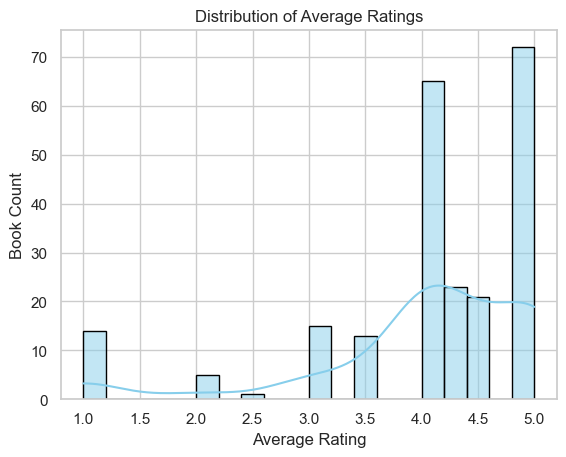

In [3]:
sns.histplot(df_cleaned['average_rating'].dropna(), bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Book Count')
plt.show()

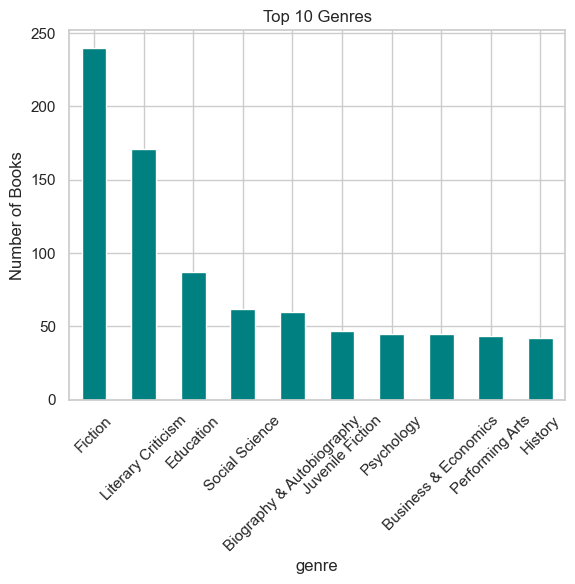

In [4]:
top_genres = df_cleaned['genre'].value_counts().head(10)
top_genres.plot(kind='bar', color='teal')
plt.title('Top 10 Genres')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

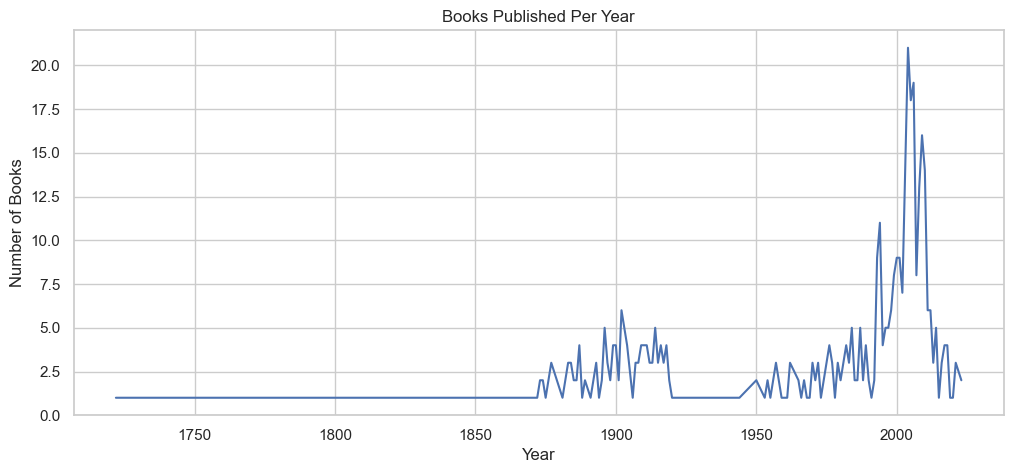

In [5]:
df_cleaned['published_year'].value_counts().sort_index().plot(kind='line', figsize=(12,5))
plt.title('Books Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()


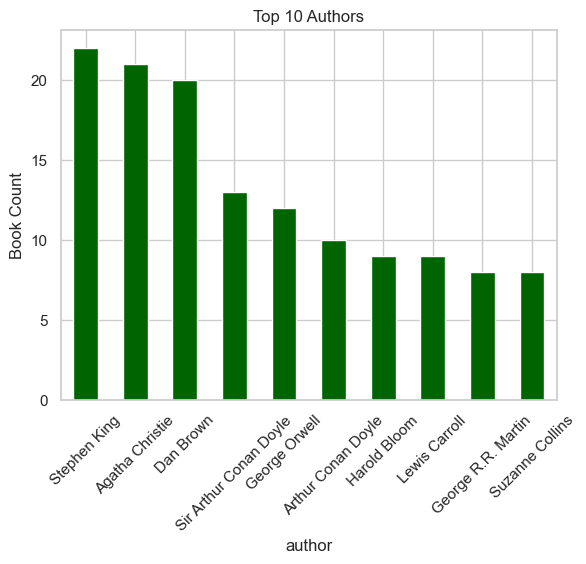

In [6]:
top_authors = df_cleaned['author'].value_counts().head(10)
top_authors.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Authors')
plt.ylabel('Book Count')
plt.xticks(rotation=45)
plt.show()


## 📌 Insights

- The most common genres are Fiction and Literary Criticism.
- Most books are rated highly, between 4.0 and 5.0.
- There's a steady rise in book publications from the late 20th century onward.
- Top authors consistently publish within similar genres, often academic or fiction-related.


## ✅ Conclusion

This analysis demonstrated trends in book ratings, genres, and publication patterns. Future enhancements may include:
- NLP on descriptions to analyze content themes
- Correlation between publishers and book success
- Interactive dashboards with Plotly or Streamlit

This project shows how Python can turn raw book metadata into meaningful insight.
